# Multi-class Classification

### 로이터 뉴스를 46개의 토픽으로 분류

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
# 1-1. Define Data: Load Reuter dataset

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data), len(test_data)

(8982, 2246)

In [4]:
'['+', '.join(map(str, train_data[0]))+']'

'[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]'

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([ (val, key) for key, val in word_index.items() ])
decoded_newswire = ' '.join([ reverse_word_index.get(i-3, '?') for i in train_data[0] ])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [ ]:
# 1-2. Define Data: list to tensor

In [8]:
import numpy as np

def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
# label to one-hot vector

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_y = to_categorical(train_labels)
one_hot_test_y = to_categorical(test_labels)

In [11]:
one_hot_test_y[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 1-3. Define Data: split to train and validation

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_y[:1000]
partial_y_train = one_hot_train_y[1000:]

In [ ]:
# 2. Model

In [13]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# 3. Compile

In [14]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 4. Train

In [15]:
history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.0653 - accuracy: 0.3678 - val_loss: 1.6836 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4666 - accuracy: 0.7004 - val_loss: 1.2992 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1010 - accuracy: 0.7655 - val_loss: 1.1533 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8897 - accuracy: 0.8067 - val_loss: 1.0359 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7127 - accuracy: 0.8391 - val_loss: 0.9721 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5478 - accuracy: 0.8867 - val_loss: 0.9428 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4294 - accuracy: 0.9114 - val_loss: 0.9498 - val_accuracy: 0.7970
Epoch 8/20
16

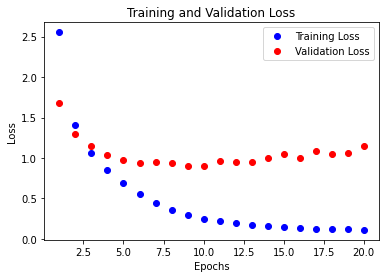

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
plt.clf()

<Figure size 432x288 with 0 Axes>

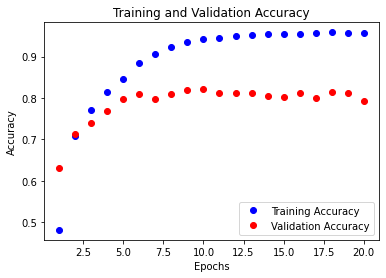

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_y)

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.9644 - accuracy: 0.4268 - val_loss: 1.5755 - val_accuracy: 0.6700
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3936 - accuracy: 0.7006 - val_loss: 1.2593 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.0326 - accuracy: 0.7711 - val_loss: 1.1075 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8242 - accuracy: 0.8243 - val_loss: 0.9988 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6578 - accuracy: 0.8533 - val_loss: 0.9524 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5059 - accuracy: 0.8963 - val_loss: 0.9089 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4067 - accuracy: 0.9160 - val_loss: 0.8922 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [20]:
results

[0.9842133522033691, 0.7902938723564148]

In [ ]:
# 7. predict

In [21]:
prediction = model.predict(x_test)

In [22]:
prediction[0]

array([6.09226918e-05, 1.62322511e-04, 8.29348937e-06, 9.35064733e-01,
       4.80954610e-02, 1.11557683e-05, 1.12223424e-05, 1.42931574e-04,
       2.40941183e-03, 1.34622787e-05, 1.06807429e-05, 9.52295784e-04,
       3.34934564e-04, 5.15735192e-05, 1.57034272e-04, 3.40295483e-05,
       4.15827904e-04, 3.90583300e-04, 3.90530622e-04, 3.08310706e-03,
       4.73988801e-03, 1.88617501e-04, 9.00090072e-06, 5.28665376e-04,
       5.34715218e-06, 5.75536251e-05, 1.88522099e-05, 6.83696999e-05,
       1.29524182e-04, 1.61052711e-04, 5.23403171e-04, 6.57299315e-05,
       2.70071469e-05, 4.14052283e-06, 5.87989402e-04, 7.64487268e-05,
       4.18469222e-04, 1.02276965e-04, 5.21553811e-05, 1.56713955e-04,
       2.93606918e-05, 6.17963378e-05, 4.93522275e-05, 1.29979933e-04,
       5.29547606e-06, 2.29389570e-06], dtype=float32)

In [23]:
prediction[0].shape

(46,)

In [24]:
np.sum(prediction[0])

0.9999999

In [25]:
np.argmax(prediction[0]), one_hot_test_y[0]

(3,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [26]:
np.array(test_labels)

array([ 3, 10,  1, ...,  3,  3, 24])

In [27]:
np.array(train_labels)

array([ 3,  4,  3, ..., 25,  3, 25])